# Accessing the project directory on my Google Drive  

In [1]:
import os
from google.colab import drive

drive.mount('/drive', force_remount=False)
project_dir = "/drive/My Drive/RNNSeq2Seq/"

# change working directory to project_dir
os.chdir(project_dir)

Mounted at /drive


# Dependencies

In [2]:
from scripts.model import *
from scripts.dataloader import create_dataloader
from scripts.utils import *
from scripts.pytorch_utils import *
import matplotlib.pyplot as plt

# Helper function to help visualize 

In [3]:
def plot_log(log):
    len_range = len(log) -1 if "Best eval accu" in log else len(log)
    epoch_nums, train_loss, dev_loss = [], [], []
    train_acc, dev_acc = [], []

    for epoch in range(1, len_range+1):
        epoch_nums.append(epoch)
        train = log[f"Epoch#{epoch}"]["Train"]
        dev = log[f"Epoch#{epoch}"]["Eval"]
        train_loss.append(train['loss'])
        train_acc.append(train['abosulate accuracy'])

        dev_loss.append(dev['loss'])
        dev_acc.append(dev['abosulate accuracy'])

    ax1 = plt.subplot(211)
    ax1.plot(epoch_nums, train_loss, label="train loss")
    ax1.plot(epoch_nums, dev_loss, label="dev loss")
    ax1.legend()

    ax2 = plt.subplot(212)
    ax2.plot(epoch_nums, train_acc, label="train acc")
    ax2.plot(epoch_nums, dev_acc, label="dev acc")
    ax2.legend()
    plt.show()

In [4]:
folder = "tuning_data/"
experiment_num = 3
shuffle_batch = False

# must be the num of seq per seq length if shuffle_batch is False
# this "tr_batch_size" will be used for dev, and shuffled test sets
tr_batch_size = 250 
dev_batch_size = 500 if not shuffle_batch else tr_batch_size

In [5]:
# setups for training and evaluting

print_freq = 5
acc_threshold = 0.5 # for saving the best trained models 
max_epoch_num = 150 # max num of epoches 
train_acc_exit=0.9999 # train acc exit threshold (eval_acc_exit must also be met)
eval_acc_exit=0.995 # dev acc exit threshold (train_acc_exit must also be met)
teacher_forcing_ratio = 1.0 # probability of using real symbol from target sequence for training

# RevStr

In [6]:
train = read_data(join(folder, "RevStr/train.txt"))
dev = read_data(join(folder, "RevStr/dev.txt"))
saved_model_fp = join(project_dir, "notebooks/Hyperparatemers Tuning/RevStr_rnn_model.pt")

train_dl = create_dataloader(train, batch_size=tr_batch_size, shuffle=shuffle_batch)
dev_dl = create_dataloader(dev, batch_size=dev_batch_size, shuffle=shuffle_batch)

## Hyperparameter set 1


In [7]:
in_vocab = ascii_lowercase
out_vocab = ascii_lowercase
in_vocab_size = len(in_vocab) + 2
out_vocab_size = len(out_vocab) + 2

hidden_size = 128
embd_dim = 128
num_layers = 1
rnn_type = "RNN"
dropout_rate = 0.0
bidirectional = False
use_attention = True
reduction_method = torch.sum

learning_rate = 5e-4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 2.8042610704898836, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.016907433199230583, 'overlap rate': 0.19731868505477906}
evaluation performance: {'loss': 2.9771506071090696, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.01866992061259225, 'overlap rate': 0.15239042416214943}

Current epoch: 10, 
training performance: {'loss': 2.398870638012886, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0424635095288977, 'overlap rate': 0.3169521581381559}
evaluation performance: {'loss': 2.847138488292694, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.03555291437078267, 'overlap rate': 0.16884182896465064}

Current epoch: 15, 
training performance: {'loss': 1.5486203104257583, 'abosulate accuracy': 0.00020000000949949026, 'consecutive overlap rate': 0.06895623686723411, 'overlap rate': 0.5967484623193741}
evaluation performance: {'loss': 1.977639338374138, 'abosulate accuracy': 0.00420000019366853, 'cons

KeyboardInterrupt: ignored

## Hyperparameter set 2

In [ ]:
hidden_size = 256
embd_dim = 128
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 2.4741487324237825, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.02864918177947402, 'overlap rate': 0.29846838414669036}
evaluation performance: {'loss': 2.7552623212337495, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.034316353499889374, 'overlap rate': 0.20842164400964974}

Current epoch: 10, 
training performance: {'loss': 2.0970348685979845, 'abosulate accuracy': 0.0005000000353902578, 'consecutive overlap rate': 0.0780305297113955, 'overlap rate': 0.41739636957645415}
evaluation performance: {'loss': 2.6770642191171645, 'abosulate accuracy': 0.00035000001662410796, 'consecutive overlap rate': 0.07058153548277915, 'overlap rate': 0.2705557122826576}

Current epoch: 15, 
training performance: {'loss': 1.0375686949118972, 'abosulate accuracy': 0.4243000192102045, 'consecutive overlap rate': 0.5898570615565404, 'overlap rate': 0.808311048336327}
evaluation performance: {'loss': 3.3496978640556336, 'abosulate acc

KeyboardInterrupt: ignored

## Hyperparameter set 3

In [ ]:
hidden_size = 256
embd_dim = 128
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 3.0160262823104858, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.005106300528859719, 'overlap rate': 0.1307379761710763}
evaluation performance: {'loss': 3.020593601465225, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.005570788925979286, 'overlap rate': 0.1356406005099416}

Current epoch: 10, 
training performance: {'loss': 2.6844782412052153, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.010400073905475437, 'overlap rate': 0.22054746523499488}
evaluation performance: {'loss': 2.8081639409065247, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.010127297893632203, 'overlap rate': 0.1740616478025913}

Current epoch: 15, 
training performance: {'loss': 2.406808525323868, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.014782778709195555, 'overlap rate': 0.2992851298302412}
evaluation performance: {'loss': 2.7172216951847075, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.014766

KeyboardInterrupt: ignored

## Hyperparameter set 4

In [10]:
hidden_size = 300
embd_dim = 150
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [11]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 2.9419930934906007, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.005102517499472015, 'overlap rate': 0.1502138774842024}
evaluation performance: {'loss': 2.95677028298378, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.005638126324629411, 'overlap rate': 0.15096797607839108}

Current epoch: 10, 
training performance: {'loss': 2.529490280151367, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.012980079959379508, 'overlap rate': 0.26629190631210803}
evaluation performance: {'loss': 2.7709416925907133, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.012317812931723893, 'overlap rate': 0.17277712356299163}

Current epoch: 15, 
training performance: {'loss': 2.2370651811361313, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.021944826282560826, 'overlap rate': 0.3505551006644964}
evaluation performance: {'loss': 2.691349869966507, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.021966

KeyboardInterrupt: ignored

# RedStr



In [ ]:
train = read_data(join(folder, "RedStr/train.txt"))
dev = read_data(join(folder, "RedStr/dev.txt"))
saved_model_fp = join(project_dir, "notebooks/Hyperparatemers Tuning/RevStr_model.pt")

train_dl = create_dataloader(train, batch_size=tr_batch_size, shuffle=shuffle_batch)
dev_dl = create_dataloader(dev, batch_size=dev_batch_size, shuffle=shuffle_batch)

## Hyperparameter set 1


In [ ]:
hidden_size = 256
embd_dim = 128
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 3.1178240716457366, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0029612316167913376, 'overlap rate': 0.09530854374170303}
evaluation performance: {'loss': 3.1366627871990205, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0027328467404004186, 'overlap rate': 0.09744077790528535}

Current epoch: 10, 
training performance: {'loss': 2.747684645652771, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.005754477635491639, 'overlap rate': 0.18260478489100934}
evaluation performance: {'loss': 2.874252986907959, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.005460862477775663, 'overlap rate': 0.12342182099819184}

Current epoch: 15, 
training performance: {'loss': 2.409950089454651, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.01051950636319816, 'overlap rate': 0.27794489711523057}
evaluation performance: {'loss': 2.639503836631775, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.010

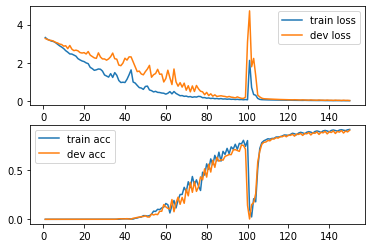

In [ ]:
plot_log(log)